# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
trunk_cities = cities[0:3]
trunk_cities

['sainte-anne-des-monts', 'queenstown', 'al-`ula']

In [18]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/forecast?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_req = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = city_req["list"][0]["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_req["city"]["coord"]["lat"]
        city_lng = city_req["city"]["coord"]["lon"]
        city_max_temp = city_req["list"][0]["main"]["temp_max"]
        city_humidity = city_req["list"][0]["main"]["humidity"]
        city_clouds = city_req["list"][0]["clouds"]
        city_wind = city_req["list"][0]["wind"]["speed"]
        city_country = city_req["city"]["country"]
        city_date = city_req["list"][0]["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sainte-anne-des-monts
Processing Record 2 of Set 1 | queenstown
Processing Record 3 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | dryden
Processing Record 6 of Set 1 | sandnessjoen
Processing Record 7 of Set 1 | palapag
Processing Record 8 of Set 1 | seferihisar
Processing Record 9 of Set 1 | rongelap
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | staroleushkovskaya
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | yaren
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | nabire
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | korem
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1 | cabo sa

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sainte-anne-des-monts,49.1240,-66.4924,18.93,63,{'all': 100},1.90,CA,1691506800
1,queenstown,-31.8976,26.8753,17.80,38,{'all': 85},3.15,ZA,1691506800
2,hermanus,-34.4187,19.2345,16.56,71,{'all': 46},5.64,ZA,1691506800
3,dryden,49.7833,-92.7503,20.03,94,{'all': 40},1.88,CA,1691506800
4,sandnessjoen,66.0217,12.6316,27.06,50,{'all': 20},7.18,NO,1691506800


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

### Pull Data from CSV

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sainte-anne-des-monts,49.1240,-66.4924,18.93,63,{'all': 100},1.90,CA,1691506800
1,queenstown,-31.8976,26.8753,17.80,38,{'all': 85},3.15,ZA,1691506800
2,hermanus,-34.4187,19.2345,16.56,71,{'all': 46},5.64,ZA,1691506800
3,dryden,49.7833,-92.7503,20.03,94,{'all': 40},1.88,CA,1691506800
4,sandnessjoen,66.0217,12.6316,27.06,50,{'all': 20},7.18,NO,1691506800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [31]:
# Confirm Date from pulled data
pd.to_datetime(city_data_df["Date"].head(1), unit='s')

City_ID
0   2023-08-08 15:00:00
Name: Date, dtype: datetime64[ns]

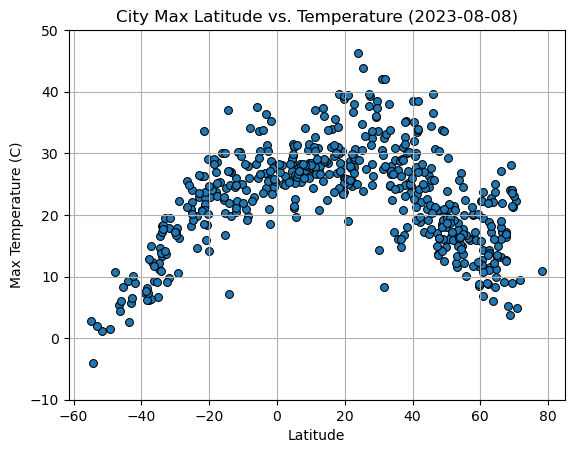

In [3]:
# Build scatter plot for latitude vs. temperature
city_data_df[["Lat", "Max Temp"]].plot(kind="scatter", x="Lat", y="Max Temp",

# Incorporate the other graph properties
                                       
                                       xlabel="Latitude", ylabel="Max Temperature (C)", title="City Max Latitude vs. Temperature (2023-08-08)",
                                       ylim=[-10,50],
                                       marker='o', edgecolor='black', s=32, linewidth=.75
                                      )

plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

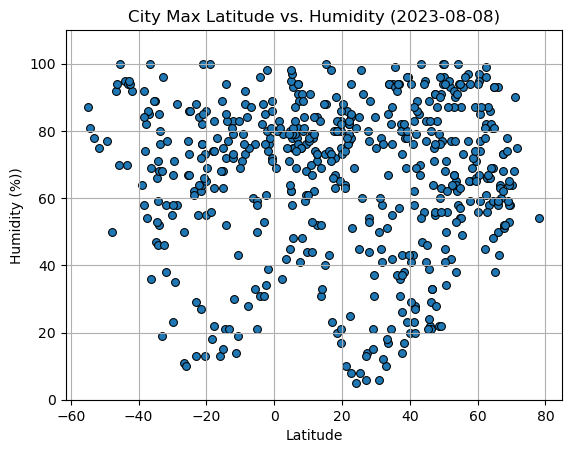

In [5]:
# Build the scatter plots for latitude vs. humidity
city_data_df[["Lat", "Humidity"]].plot(kind="scatter", x="Lat", y="Humidity",

# Incorporate the other graph properties
                                       
                                       xlabel="Latitude", ylabel="Humidity (%))", title="City Max Latitude vs. Humidity (2023-08-08)",
                                       ylim=[0,110],
                                       marker='o', edgecolor='black', s=32, linewidth=.75
                                      )

plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [39]:
city_data_df["Cloudiness"][0][8:11]

cloud_df = city_data_df[["Lat", "Cloudiness"]]

cloud_list = []

for row in city_data_df["Cloudiness"]:
    try:
        cloud_list.append(int(row[8:11]))
    except:
        try:
            cloud_list.append(int(row[8:10]))
        except:
            cloud_list.append(int(row[8:9]))
    
cloud_df["Cloud Fix"] = cloud_list

/var/folders/l3/5g30myw15rv0v5lm5flvkmx00000gn/T/ipykernel_40415/3828241544.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloud_df["Cloud Fix"] = cloud_list


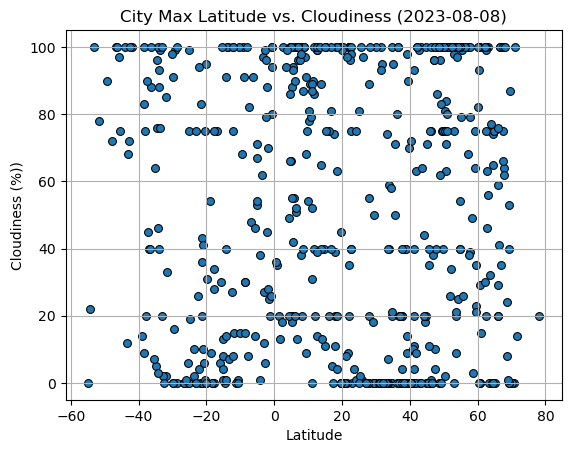

In [42]:
# Build the scatter plots for latitude vs. cloudiness


cloud_df.plot(kind="scatter", x="Lat", y="Cloud Fix",

# Incorporate the other graph properties
                                       
                                       xlabel="Latitude", ylabel="Cloudiness (%))", title="City Max Latitude vs. Cloudiness (2023-08-08)",
                                       ylim=[-5,105],
                                       marker='o', edgecolor='black', s=32, linewidth=.75
                                      )

plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

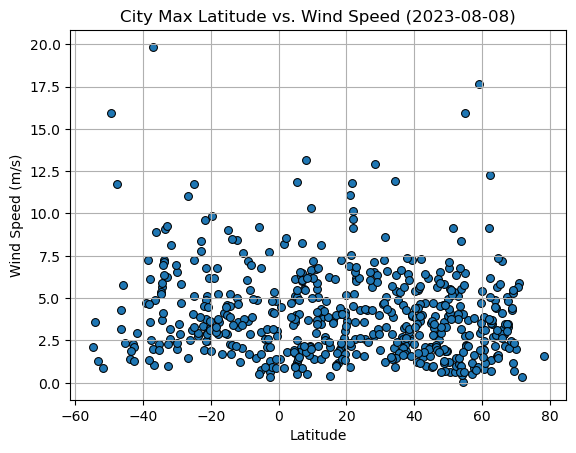

In [46]:
# Build the scatter plots for latitude vs. wind speed
city_data_df[["Lat", "Wind Speed"]].plot(kind="scatter", x="Lat", y="Wind Speed",

# Incorporate the other graph properties
                                       
                                       xlabel="Latitude", ylabel="Wind Speed (m/s)", title="City Max Latitude vs. Wind Speed (2023-08-08)",
                                       ylim=[-1,city_data_df["Wind Speed"].max()+1],
                                       marker='o', edgecolor='black', s=32, linewidth=.75
                                      )

plt.grid(axis="both")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def plotLinearRegression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is: {rvalue}')
    return equation

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sainte-anne-des-monts,49.1240,-66.4924,18.93,63,{'all': 100},1.90,CA,1691506800
3,dryden,49.7833,-92.7503,20.03,94,{'all': 40},1.88,CA,1691506800
4,sandnessjoen,66.0217,12.6316,27.06,50,{'all': 20},7.18,NO,1691506800
5,palapag,12.5458,125.1147,26.93,84,{'all': 14},3.84,PH,1691506800
6,seferihisar,38.1969,26.8390,35.28,38,{'all': 0},6.43,TR,1691506800


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,queenstown,-31.8976,26.8753,17.80,38,{'all': 85},3.15,ZA,1691506800
2,hermanus,-34.4187,19.2345,16.56,71,{'all': 46},5.64,ZA,1691506800
8,grytviken,-54.2811,-36.5092,-4.04,81,{'all': 22},3.58,GS,1691506800
9,waitangi,-43.9535,-176.5597,9.34,95,{'all': 100},1.40,NZ,1691506800
11,tolanaro,-25.0319,46.9987,24.04,73,{'all': 75},5.12,MG,1691506800


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6224901929101777


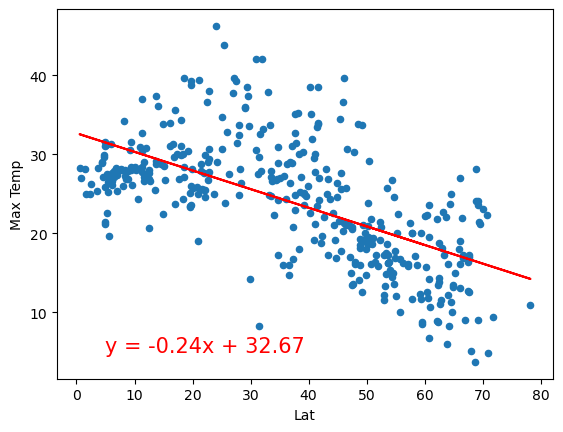

In [66]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp")
lineq = plotLinearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.annotate(lineq,(5,5),fontsize=15,color="red")
plt.show()

The r-value is: 0.8403693656456936


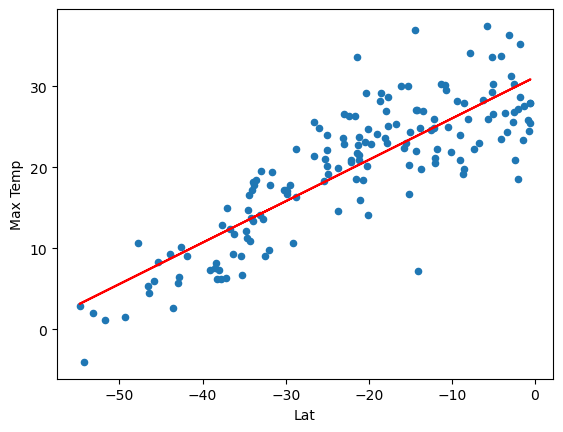

In [67]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp")
lineq = plotLinearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.annotate(lineq,(5,5),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

In both the Northern and Southern hemispheres, max temperature decreases as the absolute value of latitude increases--that is, as we move away from the equator.
The Southern hemisphere data set has a relatively strong correlation between latitude and max temperature (R-Value 0.84), while the correlation is weaker in the Northen hemisphere (R-Value: -0.62).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01594965935584313


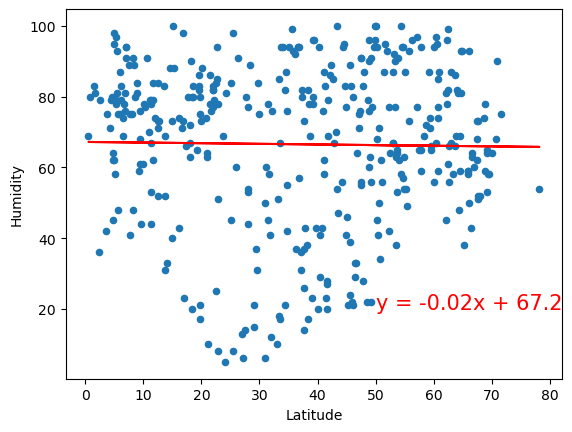

In [77]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", xlabel="Latitude")
lineq = plotLinearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.annotate(lineq,(50,20),fontsize=15,color="red")
plt.show()

The r-value is: -0.13945482667968256


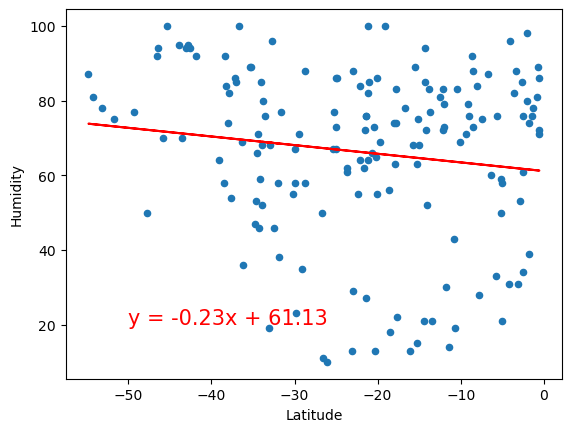

In [75]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity", xlabel="Latitude")
lineq = plotLinearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.annotate(lineq,(-50,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

The slop for both hemispheres is fairly flat. Both show low R-Values (-0.02 for the North and -0.14 for the South), implying that latitude is not well correlated with humidity.

### Cloudiness vs. Latitude Linear Regression Plot

In [78]:
# Break cloud data into hemispheres
cloud_north = cloud_df.loc[cloud_df["Lat"] >=0]
cloud_south = cloud_df.loc[cloud_df["Lat"] < 0]

The r-value is: -0.04440890159853806


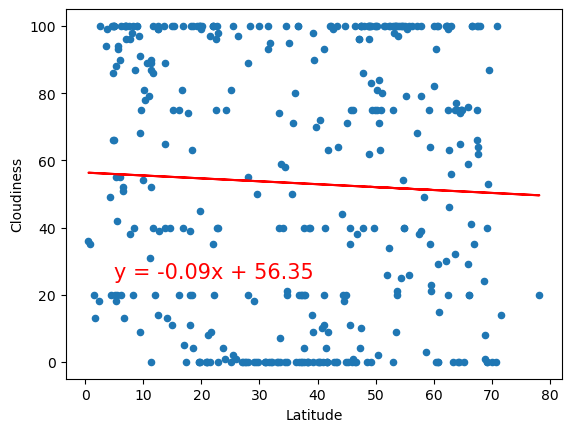

In [81]:
# Northern Hemisphere
cloud_north.plot(kind="scatter", x="Lat", y="Cloud Fix", xlabel="Latitude", ylabel="Cloudiness")
lineq = plotLinearRegression(cloud_north["Lat"], cloud_north["Cloud Fix"])
plt.annotate(lineq,(5,25),fontsize=15,color="red")
plt.show()

The r-value is: -0.09957298539406224


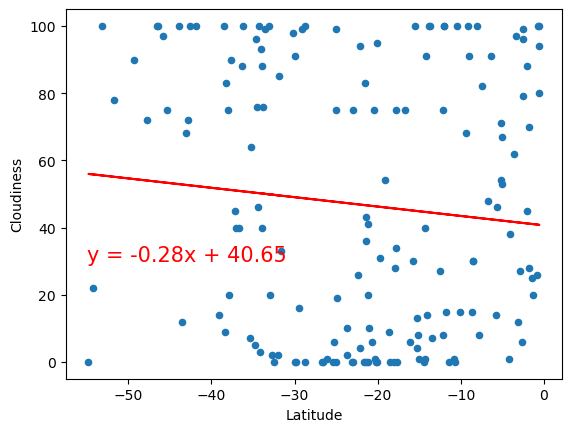

In [82]:
# Southern Hemisphere
cloud_south.plot(kind="scatter", x="Lat", y="Cloud Fix", xlabel="Latitude", ylabel="Cloudiness")
lineq = plotLinearRegression(cloud_south["Lat"], cloud_south["Cloud Fix"])
plt.annotate(lineq,(-55,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

For both hemispheres, cloudiness appears to be uncorrelated to latitude. The plots appear to group points closer to the extremes (100% or 0%), and the R-Values are both below 0.1.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10964204356958976


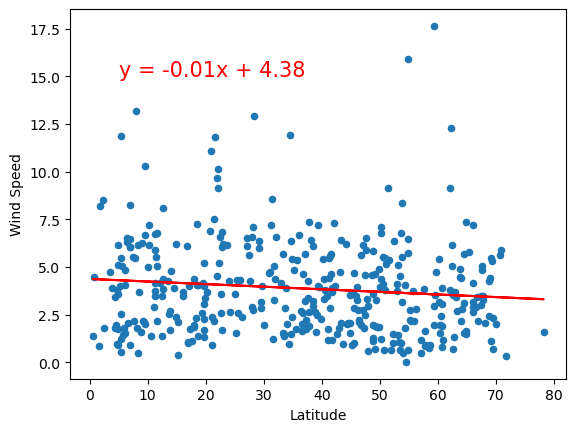

In [72]:
# Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", xlabel="Latitude")
lineq = plotLinearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.annotate(lineq,(5,15),fontsize=15,color="red")
plt.show()

The r-value is: -0.16557145146224986


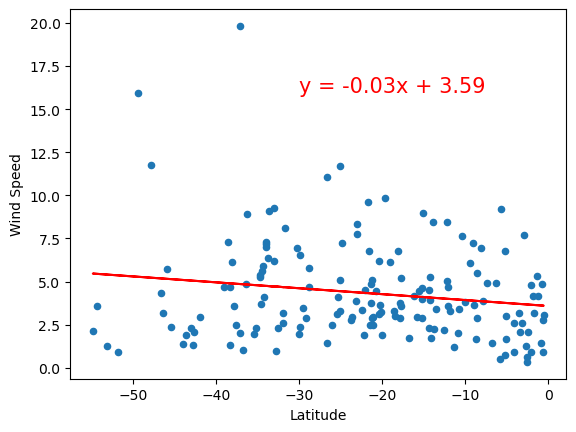

In [71]:
# Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed", xlabel="Latitude")
lineq = plotLinearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.annotate(lineq,(-30,16),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** 

Again, both hemispheres experience a very weak correlation between latitude and wind speed. Both have R-Values between -0.1 and -0.2.